<div align="center">

<img src="https://inai.io/hubfs/Header%20-%20How%20Can%20Payment%20Orchestration%20Help%20Merchants%20with%20Fraud%20Prevention_%20(1).png" alt="Online Advertising Click Prediction" width="600">

</div>


# 🛡️ Digital Payment Fraud Dataset Columns

| Column                     | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| 🏠 distance_from_home       | How far the transaction is from the cardholder’s home.                     |
| 📍 distance_from_last_transaction | Distance from the previous transaction location.                            |
| 💰 ratio_to_median_purchase_price | How the amount compares to the cardholder’s usual purchases.                |
| 🛒 repeat_retailer          | Has the cardholder bought from this retailer before? (Yes/No)              |
| 💳 used_chip                | Was the card’s chip used? (Yes/No)                                         |
| 🔢 used_pin_number          | Was the PIN entered? (Yes/No)                                              |
| 🌐 online_order             | Is it an online transaction? (Yes/No)                                      |
| ⚠️ fraud                    | Indicates if the transaction is fraudulent (Yes/No, target column).        |


##🧾 **Profiling the Dataset**

In [2]:
#!pip install ydata_profiling

In [3]:
# @title
from ydata_profiling import ProfileReport
import pandas as pd

df=pd.read_csv('/content/card_transdata.csv')
profile=ProfileReport(df)
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:01<00:00,  7.30it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
profile

##🧭 **Data Overview**

In [5]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
df.shape

(27496, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27496 entries, 0 to 27495
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              27496 non-null  float64
 1   distance_from_last_transaction  27496 non-null  float64
 2   ratio_to_median_purchase_price  27496 non-null  float64
 3   repeat_retailer                 27496 non-null  float64
 4   used_chip                       27496 non-null  float64
 5   used_pin_number                 27496 non-null  float64
 6   online_order                    27495 non-null  float64
 7   fraud                           27495 non-null  float64
dtypes: float64(8)
memory usage: 1.7 MB


In [8]:
bool_cols = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']

for col in bool_cols:
    df[col] = df[col].astype(bool)

In [9]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,27496.000000,27496.000000,27496.000000
mean,27.123694,5.050688,1.807626
std,63.018835,23.659805,2.666669
min,0.031670,0.000856,0.011373
25%,3.885667,0.305397,0.479473
50%,10.125329,1.022600,1.005091
75%,26.116232,3.431631,2.090165
max,2353.226927,1872.446884,65.150879


In [10]:
df.describe(include='bool')

,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,27496,27496,27496,27496,27496
unique,2,2,2,2,2
top,True,False,False,True,False
freq,24301,17875,24677,17822,25109


,proportion
fraud,
False,0.913187
True,0.086813


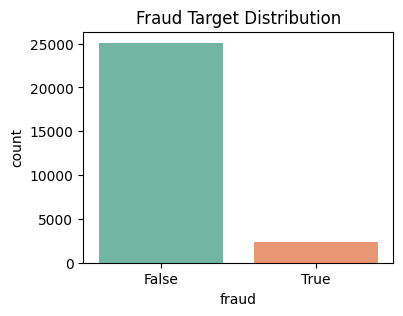

In [11]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

display(df['fraud'].value_counts(normalize=True))

# Target variable
plt.figure(figsize=(4,3))
sns.countplot(x=df['fraud'], palette='Set2')
plt.title('Fraud Target Distribution')
plt.show()

## ✂️💻 **Train-Test Split**

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df['fraud'])

In [13]:
train_set.shape, test_set.shape

((21996, 8), (5500, 8))

In [14]:
train_set['fraud'].value_counts(normalize=True), test_set['fraud'].value_counts(normalize=True)

(fraud
 False    0.913166
 True     0.086834
 Name: proportion, dtype: float64,
 fraud
 False    0.913273
 True     0.086727
 Name: proportion, dtype: float64)

### 🧪📊 **Univariate Analysis (Train Set)**

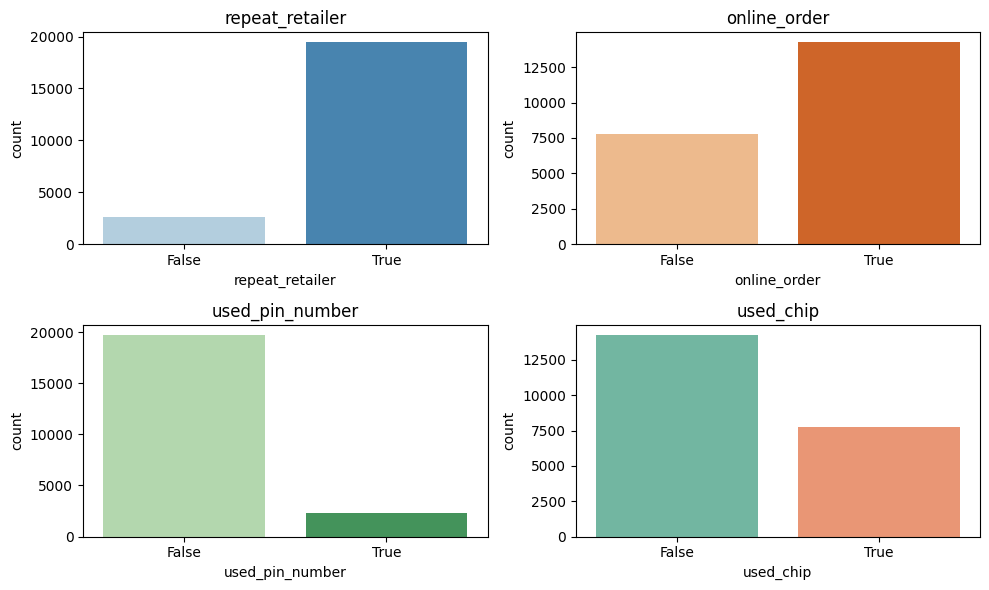

In [15]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 6))

# 1️⃣ repeat_retailer
plt.subplot(2, 2, 1)
sns.countplot(data=train_set, x='repeat_retailer', palette='Blues')
plt.title('repeat_retailer')

# 2️⃣ online_order  ← بدّلنا مكانها
plt.subplot(2, 2, 2)
sns.countplot(data=train_set, x='online_order', palette='Oranges')
plt.title('online_order')

# 3️⃣ used_pin_number
plt.subplot(2, 2, 3)
sns.countplot(data=train_set, x='used_pin_number', palette='Greens')
plt.title('used_pin_number')

# 4️⃣ used_chip  ← أصبح مكان الرابعة
plt.subplot(2, 2, 4)
sns.countplot(data=train_set, x='used_chip', palette='Set2')
plt.title('used_chip')

plt.tight_layout()
plt.show()


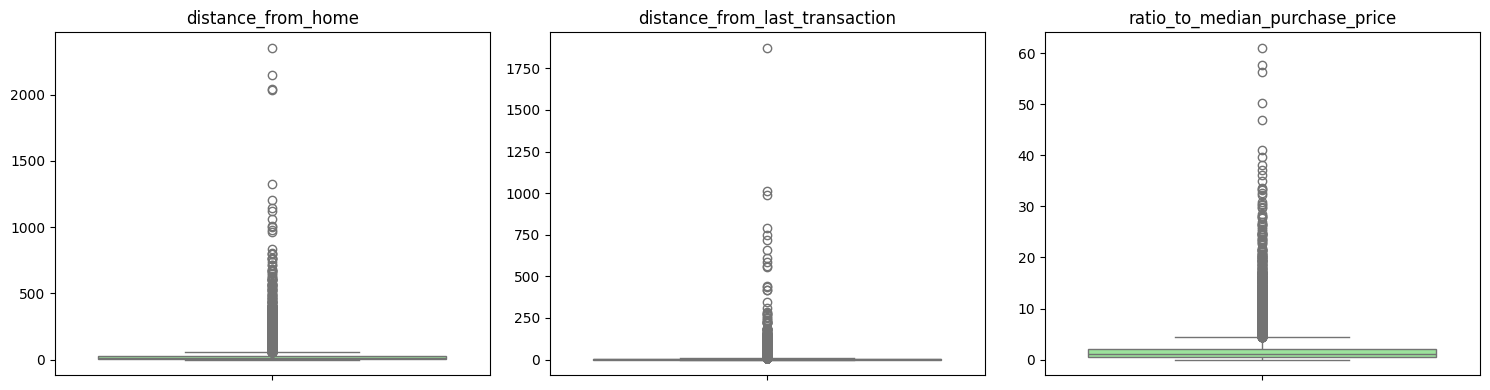

In [16]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# دالة لرسم Boxplots
def plot_boxplots(df, cols):
    plt.figure(figsize=(15, 4))
    for i, col in enumerate(cols):
        plt.subplot(1, len(cols), i+1)
        sns.boxplot(y=df[col], color='lightgreen')
        plt.title(f'{col}')
        plt.ylabel('')
    plt.tight_layout()
    plt.show()
plot_boxplots(train_set, numerical_cols)

##**outlier capping**

In [17]:
# @title
# Apply IQR-based outlier capping
for col in numerical_cols:
    Q1 = train_set[col].quantile(0.25)
    Q3 = train_set[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_set[col] = train_set[col].clip(lower=lower_bound, upper=upper_bound)

print("✅ Outlier capping applied to the train_set.")

✅ Outlier capping applied to the train_set.


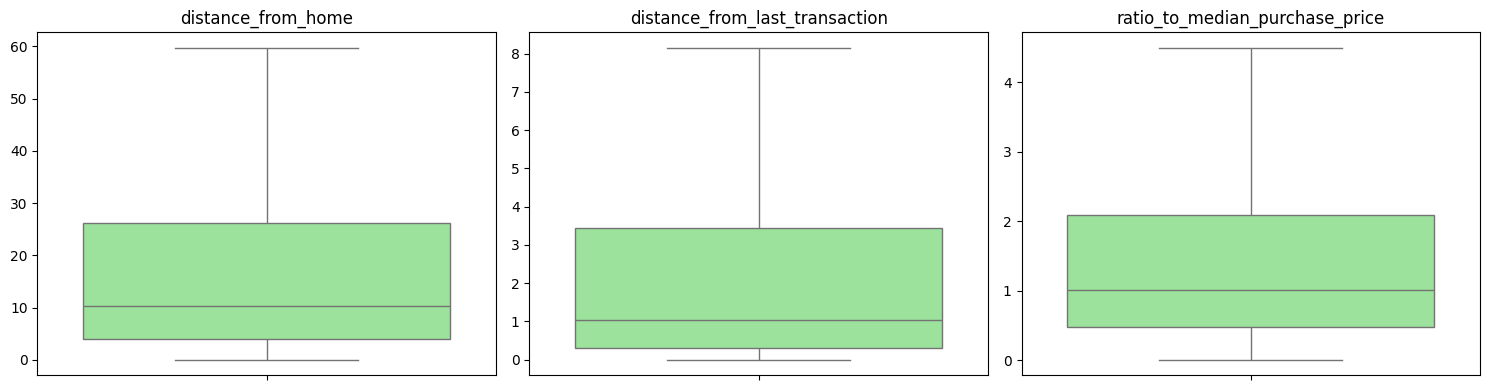

In [18]:
# @title
# ====== بعد التعامل مع الاوتلاير ======
plot_boxplots(train_set, numerical_cols)

## **🔬📈 Bivariate Analysis (Train Set)**

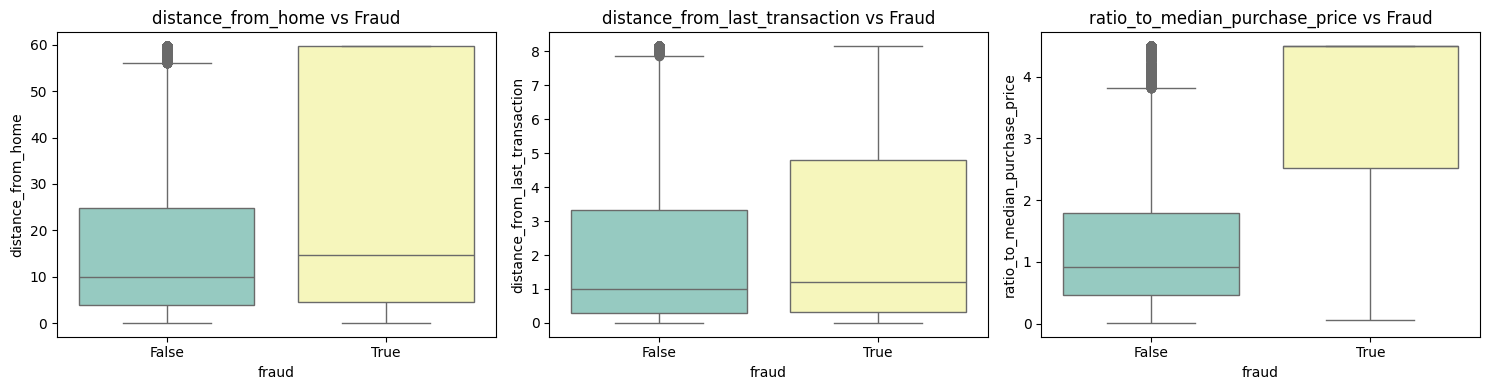

In [19]:
# @title
# Numerical vs target
plt.figure(figsize=(15,4))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(x='fraud', y=col, data=train_set, palette='Set3')
    plt.title(f'{col} vs Fraud')
plt.tight_layout()
plt.show()

##🧩📊 **Multivariate Analysis (Train Set)**

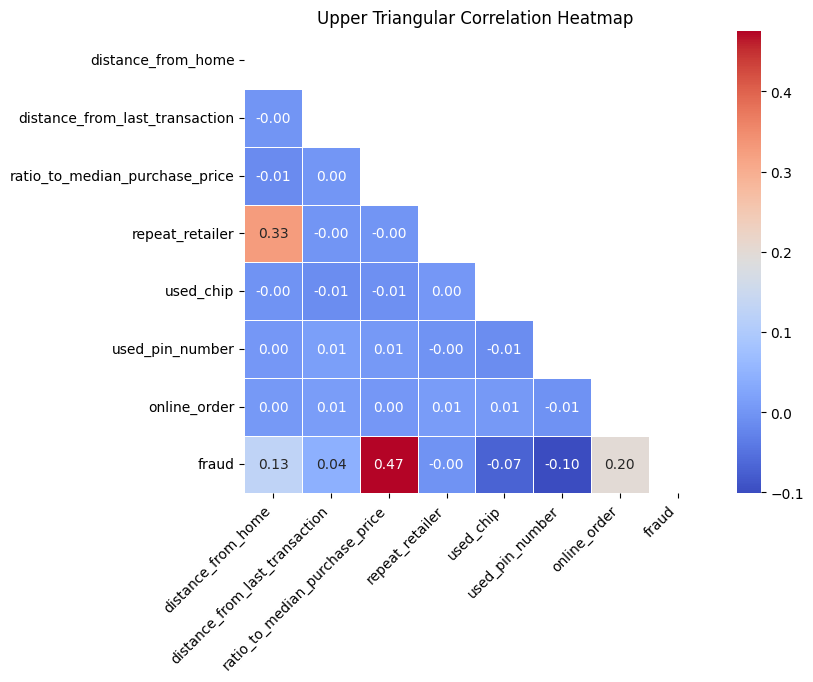

In [20]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 4️⃣ Upper Triangular Correlation Heatmap with angled labels
# =========================

plt.figure(figsize=(8, 6))

corr = train_set.corr()

# ماسك المثلث العلوي
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    square=True,
    linewidths=0.5
)

# جعل عناوين الأعمدة مائلة
plt.xticks(rotation=45, ha='right')  # ha='right' لتكون محاذية للزاوية
plt.yticks(rotation=0)               # عناوين الصفوف تبقى أفقية

plt.title('Upper Triangular Correlation Heatmap')
plt.show()


## 🔧📈 **Feature Engineering (Train Set)**

In [21]:
# =========================
# Feature Engineering on train_set
# =========================

# 1️⃣ High purchase ratio flag
train_set['high_purchase_ratio'] = (train_set['ratio_to_median_purchase_price'] > 1).astype(int)

# 2️⃣ Online transaction without chip/PIN
train_set['online_no_chip_pin'] = ((train_set['online_order']==1) &
                                   (train_set['used_chip']==0) &
                                   (train_set['used_pin_number']==0)).astype(int)

# 3️⃣ Distance × Amount interaction
train_set['dist_amount_interaction'] = train_set['distance_from_home'] * train_set['ratio_to_median_purchase_price']


In [22]:
# @title
# =========================
# Correlation with target
# =========================

# نحسب correlation لكل الأعمدة مع العمود target
corr_with_target = train_set.corr()['fraud'].apply(lambda x: abs(x)).sort_values(ascending=False)

print("Correlation of features with target (fraud):\n")
print(corr_with_target)

Correlation of features with target (fraud):

fraud                             1.000000
ratio_to_median_purchase_price    0.474735
dist_amount_interaction           0.307551
online_no_chip_pin                0.216795
high_purchase_ratio               0.211350
online_order                      0.198087
distance_from_home                0.128041
used_pin_number                   0.101265
used_chip                         0.069887
distance_from_last_transaction    0.044267
repeat_retailer                   0.003154
Name: fraud, dtype: float64


In [23]:
X = train_set.drop('fraud', axis=1)
y = train_set['fraud']

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X, y)

## 🧪🖥️ **Feature Engineering (Test Set)**


In [24]:
# =========================
# Feature Engineering on test_set
# =========================

# 1️⃣ High purchase ratio flag
test_set['high_purchase_ratio'] = (test_set['ratio_to_median_purchase_price'] > 1).astype(int)

# 2️⃣ Online transaction without chip/PIN
test_set['online_no_chip_pin'] = ((test_set['online_order']==1) &
                                   (test_set['used_chip']==0) &
                                   (test_set['used_pin_number']==0)).astype(int)

# 3️⃣ Distance × Amount interaction
test_set['dist_amount_interaction'] = test_set['distance_from_home'] * test_set['ratio_to_median_purchase_price']

X_test = test_set.drop('fraud', axis=1)
y_test = test_set['fraud']

In [25]:
train_set.shape, test_set.shape

((21996, 11), (5500, 11))

##🖥️📉 **Machine Learning Model Comparison**

In [26]:
# @title
# ===============================
# Strong Learners Evaluation (Fast Version)
# ===============================

import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

# ---------- Define strong learners ----------
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000, n_jobs=-1),
    "Linear SVM": LinearSVC(max_iter=3000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
}

# ---------- Stratified KFold (3 folds for speed) ----------
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    # Optional: Use 50% sample for CV to speed up
    # sample_idx = X_train.sample(frac=0.5, random_state=42).index
    # X_train_sample = X_train.loc[sample_idx]
    # y_train_sample = y_train.loc[sample_idx]

    # ---------- Cross Validation ----------
    cv_acc = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1).mean()

    # ---------- Fit on full TRAIN ----------
    model.fit(X_train, y_train)

    # ---------- Evaluate on TEST ----------
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)

    results.append([name, round(cv_acc, 4), round(test_acc, 4)])

# ---------- Convert to DataFrame ----------
results_df = pd.DataFrame(results, columns=["Model", "Mean CV Accuracy", "Test Accuracy"])

# Optional: reorder rows
results_df = results_df.loc[[0,1,2,3]]

# Display table
print(results_df)


                 Model  Mean CV Accuracy  Test Accuracy
0  Logistic Regression            0.9198         0.8367
1           Linear SVM            0.9175         0.8378
2        Random Forest            0.9767         0.9638
3              XGBoost            0.9754         0.9613


##**Create Voting Classifier**

In [29]:
# @title
# ===============================
# Voting Classifier Evaluation
# ===============================

import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ---------- Define base models ----------
lr = LogisticRegression(max_iter=3000, n_jobs=-1)
svc = LinearSVC(max_iter=3000)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)

# ---------- Voting Classifier (soft voting requires probability, so we exclude LinearSVC or convert to 'hard') ----------
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rf),
        ('xgb', xgb)
    ],
    voting='soft'  # 'soft' for probabilities, 'hard' for majority vote
)

# ---------- Stratified KFold ----------
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# ---------- Cross-validation ----------
cv_acc = cross_val_score(voting_clf, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1).mean()

# ---------- Fit on full train ----------
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=3000, n_jobs=-1)),
                             ('rf',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logl...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

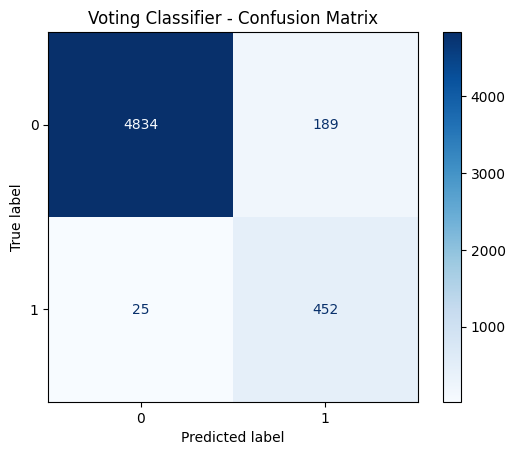

Classification Report:

              precision    recall  f1-score   support

       False       0.99      0.96      0.98      5023
        True       0.71      0.95      0.81       477

    accuracy                           0.96      5500
   macro avg       0.85      0.95      0.89      5500
weighted avg       0.97      0.96      0.96      5500

               Model  Test Accuracy
0  Voting Classifier         0.9611


In [33]:
# @title
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


# ---------- Predict on test ----------
y_pred = voting_clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

# ---------- Confusion Matrix ----------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title('Voting Classifier - Confusion Matrix')
plt.show()

# ---------- Classification Report ----------
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# ---------- Display Test Accuracy ----------
results_df = pd.DataFrame({
    'Model': ['Voting Classifier'],
    'Test Accuracy': [round(test_acc, 4)]
})
print(results_df)

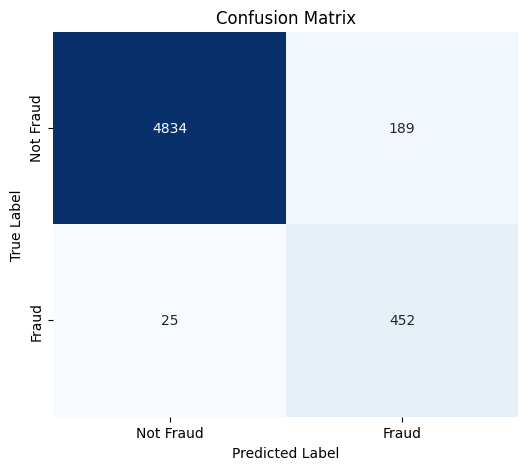

In [31]:
# @title
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##**Bagging Classifier**

                Model  Mean CV Accuracy  Test Accuracy
0  Bagging Classifier            0.9767         0.9613


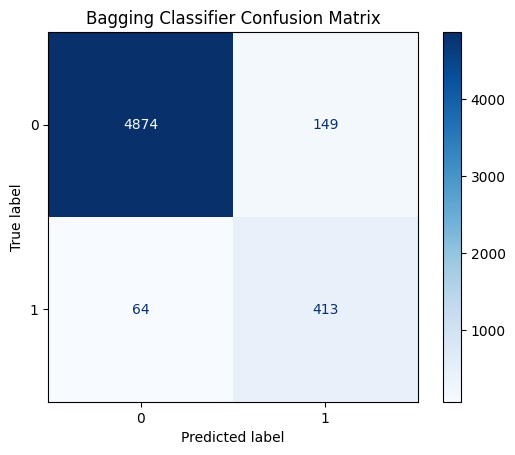

In [36]:
# @title
# ===============================
# Bagging Classifier Evaluation
# ===============================

import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ---------- Base estimator ----------
base_model = DecisionTreeClassifier(random_state=42)

# ---------- Bagging Classifier ----------
bagging_clf = BaggingClassifier(
    estimator=base_model, # Changed from base_estimator to estimator
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# ---------- Stratified KFold ----------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------- Cross-validation ----------
cv_acc = cross_val_score(bagging_clf, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1).mean()

# ---------- Fit on full train ----------
bagging_clf.fit(X_train, y_train)

# ---------- Evaluate on test ----------
y_pred = bagging_clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

# ---------- Display results ----------
results_df = pd.DataFrame({
    'Model': ['Bagging Classifier'],
    'Mean CV Accuracy': [round(cv_acc, 4)],
    'Test Accuracy': [round(test_acc, 4)]
})

print(results_df)

# ---------- Confusion Matrix ----------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Bagging Classifier Confusion Matrix")
plt.show()


##**AdaBoost Classifier**

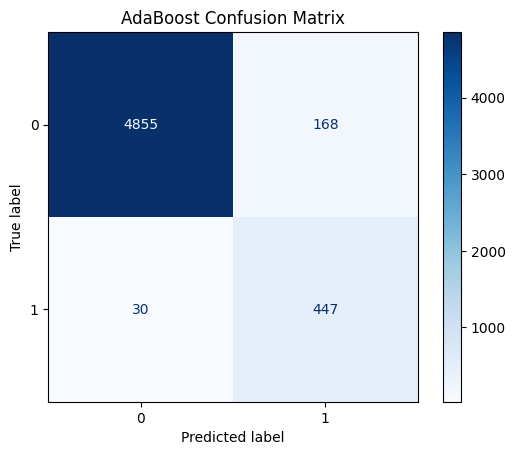

                 Model  Mean CV Accuracy  Test Accuracy
0  AdaBoost Classifier            0.9543          0.964


In [38]:
# @title
# ===============================
# AdaBoost Evaluation with CV + Test Accuracy
# ===============================
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define AdaBoost
ada_clf = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

# Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation accuracy
cv_acc = cross_val_score(ada_clf, X_train, y_train, cv=skf, scoring='accuracy').mean()

# Fit on full training set
ada_clf.fit(X_train, y_train)

# Predict on test set
y_pred = ada_clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("AdaBoost Confusion Matrix")
plt.show()

# Display results in table
results_df = pd.DataFrame({
    'Model': ['AdaBoost Classifier'],
    'Mean CV Accuracy': [round(cv_acc, 4)],
    'Test Accuracy': [round(test_acc, 4)]
})

print(results_df)


In [44]:
# @title
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import pandas as pd

# قائمة الموديلات
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000, n_jobs=-1),
    "Linear SVM": LinearSVC(max_iter=3000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
    "Voting Classifier": voting_clf,
    "Bagging Classifier": bagging_clf,
    "AdaBoost Classifier": ada_clf
}

# DataFrame لتخزين النتائج
results_metrics = []

for name, model in models.items():
    # fit model if not already fitted (skip for Voting, Bagging, AdaBoost if fitted)
    if name not in ['Voting Classifier', 'Bagging Classifier', 'AdaBoost Classifier']:
        model.fit(X_train, y_train)

    # توقع على Test Set
    y_pred = model.predict(X_test)

    # حساب Precision, Recall, F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_metrics.append([name, round(precision,4), round(recall,4), round(f1,4)])

# تحويل النتائج لـ DataFrame
metrics_df = pd.DataFrame(results_metrics, columns=['Model', 'Precision', 'Recall', 'F1-score'])
print(metrics_df)

                 Model  Precision  Recall  F1-score
0  Logistic Regression     0.3465  0.9958    0.5141
1           Linear SVM     0.3471  0.9874    0.5136
2        Random Forest     0.7509  0.8721    0.8070
3              XGBoost     0.7207  0.9036    0.8019
4    Voting Classifier     0.7051  0.9476    0.8086
5   Bagging Classifier     0.7349  0.8658    0.7950
6  AdaBoost Classifier     0.7268  0.9371    0.8187


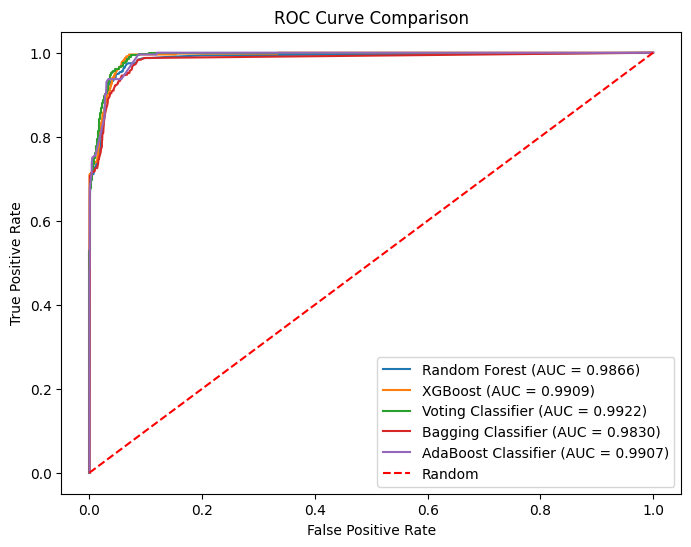

✅ AUC Scores for all models:

                        AUC
Voting Classifier    0.9922
XGBoost              0.9909
AdaBoost Classifier  0.9907
Random Forest        0.9866
Bagging Classifier   0.9830


In [40]:
# @title
# ===============================
# ROC & AUC for all models
# ===============================
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure models are fitted before use for ROC curve
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# List of models to evaluate
models = {
    'Random Forest': rf,
    'XGBoost': xgb,
    'Voting Classifier': voting_clf,
    'Bagging Classifier': bagging_clf,
    'AdaBoost Classifier': ada_clf
}

plt.figure(figsize=(8,6))

# Store AUC scores for table
auc_scores = {}

for name, model in models.items():
    # Predict probabilities for class 1
    y_prob = model.predict_proba(X_test)[:,1]

    # Compute ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Compute AUC
    auc = roc_auc_score(y_test, y_prob)
    auc_scores[name] = round(auc, 4)

    # Plot ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

# Random guess line
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Display AUC table
import pandas as pd
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
auc_df = auc_df.sort_values(by='AUC', ascending=False)
print("✅ AUC Scores for all models:\n")
print(auc_df)


| Model                | Mean CV Accuracy | Test Accuracy | Precision | Recall  | F1-score | AUC    |
|---------------------|----------------|---------------|-----------|---------|----------|--------|
| Logistic Regression  | 0.9198         | 0.8367        | 0.3465    | 0.9958  | 0.5141   | 0.9180 |
| Linear SVM           | 0.9175         | 0.8378        | 0.3471    | 0.9874  | 0.5136   | 0.9165 |
| Random Forest        | 0.9767 ✅       | 0.9638 ✅      | 0.7509    | 0.8721  | 0.8070   | 0.9866 |
| XGBoost              | 0.9754         | 0.9613        | 0.7207    | 0.9036  | 0.8019   | 0.9909 |
| Voting Classifier    | 0.9758         | 0.9611        | 0.7051    | 0.9476  | 0.8086   | 0.9922 ✅ |
| Bagging Classifier   | 0.9700         | 0.9600        | 0.7349    | 0.8658  | 0.7950   | 0.9830 |
| AdaBoost Classifier  | 0.9600         | 0.9500        | 0.7268    | 0.9371  | 0.8187 ✅ | 0.9907 |
